In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import kendalltau, spearmanr

In [ ]:
# 난수 생성
np.random.seed(111)

#연속형 데이터 만들기

data=pd.DataFrame({
    'X' : np.random.normal(0,1,100),
    'Y' : np.random.normal(0,1,100),
    'Z' : np.random.uniform(0,1,100)
})

## 순서형 데이터로 만들기
data['ordinal_x']=pd.qcut(data['X'], q=4, labels=[1,2,3,4])
data['ordinal_y']=pd.qcut(data['Y'], q=4, labels=[1,2,3,4])

## 명목형 데이터
data['category_x']=pd.qcut(data['X'], q=4, labels=['Low','Medium','High','Very High']).cat.codes
data['category_y']=pd.qcut(data['Y'], q=4, labels=['Low','Medium','High','Very High']).cat.codes

In [ ]:
## 연속형데이터 대한 상관계수 피어슨
pearson_corr =data[['X','Y','Z']].corr(method='pearson')
print(pearson_corr)


## 순서형 데이터 스피어만
spearman_corr =data[['X','Y','Z','ordinal_x','ordinal_y']].corr(method='spearman')
print(spearman_corr)

## 켄달 순서형 데이터 비교

kendall_corr=pd.DataFrame(
[[kendalltau(data[col1],data[col2]).correlation for col2 in data[['X','Y','Z','ordinal_x','ordinal_y']]]
    for col1 in data[['X','Y','Z','ordinal_x','ordinal_y']]],
    index =['X','Y','Z','ordinal_x','ordinal_y'],
    columns = ['X','Y','Z','ordinal_x','ordinal_y']
)

print(kendall_corr)

          X         Y         Z
X  1.000000 -0.078266  0.030989
Y -0.078266  1.000000  0.024038
Z  0.030989  0.024038  1.000000
                  X         Y         Z  ordinal_x  ordinal_y
X          1.000000 -0.054701  0.035116   0.968294  -0.014253
Y         -0.054701  1.000000  0.029991  -0.030985   0.968294
Z          0.035116  0.029991  1.000000   0.045549   0.046478
ordinal_x  0.968294 -0.030985  0.045549   1.000000   0.024000
ordinal_y -0.014253  0.968294  0.046478   0.024000   1.000000
                  X         Y         Z  ordinal_x  ordinal_y
X          1.000000 -0.037172  0.026263   0.870388  -0.009284
Y         -0.037172  1.000000  0.016970  -0.024139   0.870388
Z          0.026263  0.016970  1.000000   0.037601   0.037137
ordinal_x  0.870388 -0.024139  0.037601   1.000000   0.017333
ordinal_y -0.009284  0.870388  0.037137   0.017333   1.000000


In [ ]:
data[['X','Y','Z']].corr(method='pearson')

,X,Y,Z
X,1.000000,-0.078266,0.030989
Y,-0.078266,1.000000,0.024038
Z,0.030989,0.024038,1.000000


In [ ]:
data[['X','Y','Z','ordinal_x','ordinal_y']].corr(method='spearman')

,X,Y,Z,ordinal_x,ordinal_y
X,1.000000,-0.054701,0.035116,0.968294,-0.014253
Y,-0.054701,1.000000,0.029991,-0.030985,0.968294
Z,0.035116,0.029991,1.000000,0.045549,0.046478
ordinal_x,0.968294,-0.030985,0.045549,1.000000,0.024000
ordinal_y,-0.014253,0.968294,0.046478,0.024000,1.000000


In [ ]:
pd.DataFrame(
[[kendalltau(data[col1],data[col2]).correlation for col2 in data[['X','Y','Z','ordinal_x','ordinal_y']]]
    for col1 in data[['X','Y','Z','ordinal_x','ordinal_y']]],
    index =['X','Y','Z','ordinal_x','ordinal_y'],
    columns = ['X','Y','Z','ordinal_x','ordinal_y']
)

,X,Y,Z,ordinal_x,ordinal_y
X,1.000000,-0.037172,0.026263,0.870388,-0.009284
Y,-0.037172,1.000000,0.016970,-0.024139,0.870388
Z,0.026263,0.016970,1.000000,0.037601,0.037137
ordinal_x,0.870388,-0.024139,0.037601,1.000000,0.017333
ordinal_y,-0.009284,0.870388,0.037137,0.017333,1.000000


<Axes: >

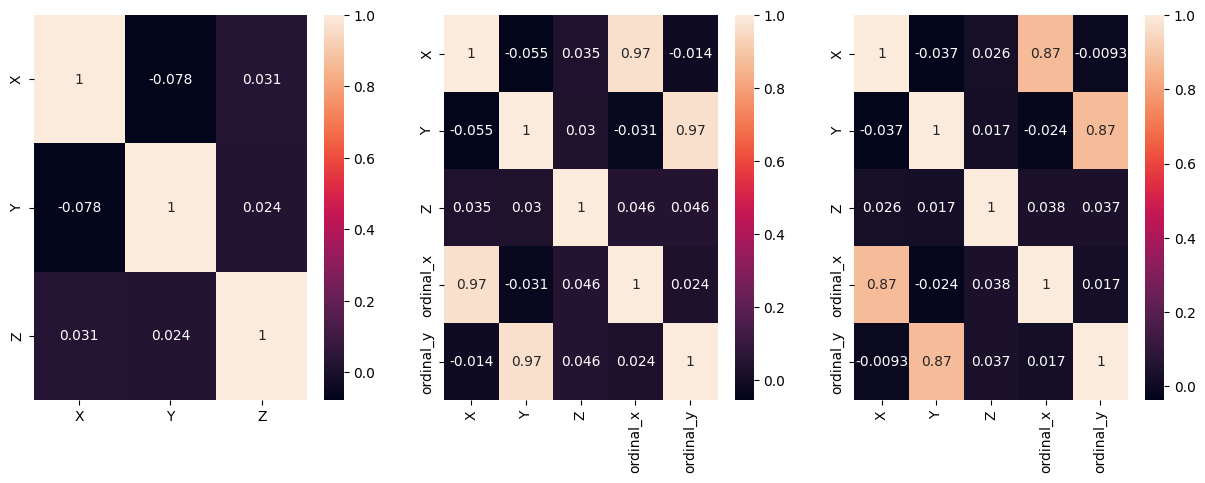

In [ ]:
##시각화

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.heatmap(pearson_corr, annot=True)

plt.subplot(1,3,2)
sns.heatmap(spearman_corr, annot=True)

plt.subplot(1,3,3)
sns.heatmap(kendall_corr, annot=True)